In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTENC

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("final_data.csv")
df = data.copy()
print(df.shape)
df.head()

(529, 66)


,PCOS (Y/N),Age (yrs),BMI,Pulse rate(bpm),Menstrual Cycle Length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),...,RBS(mg/dl)_low,RBS(mg/dl)_normal,BP _Systolic (mmHg)_high,BP _Systolic (mmHg)_normal,BP _Diastolic (mmHg)_high,BP _Diastolic (mmHg)_normal,I beta-HCG cat_abnormal,I beta-HCG cat_normal,II beta-HCG cat_abnormal,II beta-HCG cat_normal
0,0,28,19.3,78,5,7.0,0,0,1.99,1.99,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0,36,24.9,74,5,11.0,1,0,60.80,1.99,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,1,33,25.3,72,5,10.0,1,0,494.08,494.08,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0,37,29.7,72,5,4.0,0,0,1.99,1.99,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0,25,20.1,72,5,1.0,1,0,801.45,801.45,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [3]:
df.describe()

,PCOS (Y/N),Age (yrs),BMI,Pulse rate(bpm),Menstrual Cycle Length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),...,RBS(mg/dl)_low,RBS(mg/dl)_normal,BP _Systolic (mmHg)_high,BP _Systolic (mmHg)_normal,BP _Diastolic (mmHg)_high,BP _Diastolic (mmHg)_normal,I beta-HCG cat_abnormal,I beta-HCG cat_normal,II beta-HCG cat_abnormal,II beta-HCG cat_normal
count,529.000000,529.000000,529.00000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,...,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000
mean,0.323251,31.425331,24.32344,73.474480,4.937618,7.651607,0.387524,0.283554,677.077289,242.586936,...,0.001890,0.981096,0.003781,0.996219,0.001890,0.998110,0.236295,0.763705,0.158790,0.841210
std,0.468161,5.430222,4.08396,2.709378,1.498068,4.801196,0.487646,0.684607,3385.601032,1621.544221,...,0.043478,0.136314,0.061429,0.061429,0.043478,0.043478,0.425207,0.425207,0.365826,0.365826
min,0.000000,20.000000,12.40000,70.000000,0.000000,0.000000,0.000000,0.000000,1.300000,0.990000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,27.000000,21.60000,72.000000,5.000000,4.000000,0.000000,0.000000,1.990000,1.990000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,0.000000,31.000000,24.20000,72.000000,5.000000,7.000000,0.000000,0.000000,20.000000,1.990000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,35.000000,26.70000,74.000000,5.000000,10.000000,1.000000,0.000000,300.530000,100.090000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,48.000000,38.90000,82.000000,12.000000,30.000000,1.000000,5.000000,32460.970000,25000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.keys()

Index(['PCOS (Y/N)', 'Age (yrs)', 'BMI', 'Pulse rate(bpm)',
       'Menstrual Cycle Length(days)', 'Marriage Status (Yrs)',
       'Pregnant(Y/N)', 'No. of abortions', 'I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH/LH', 'Waist:Hip Ratio',
       'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
       'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)',
       'Reg.Exercise(Y/N)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Blood Group_A+', 'Blood Group_A-', 'Blood Group_AB+',
       'Blood Group_AB-', 'Blood Group_B+', 'Blood Group_B-', 'Blood Group_O+',
       'Blood Group_O-', 'Menstrual Cycle(R/I)_irregular',
       'Menstrual Cycle(R/I)_regular', 'Symptoms score',
       'Unhealthy living score', 'RR (breaths/min)_high',
       'RR (breaths/min)_normal', 'Hb(g/dl)_low', 'Hb(g/dl)_normal',
       'TSH (mIU/L)_high', 'TSH (mIU/L)_low', 'TSH (mIU/L)_normal',
       'AMH(ng/mL)_

## Data Preparation
- Split dataset (80-20)
- Standardise features
- Handle class imbalance with SMOTE

In [5]:
# dependent variable
y= df['PCOS (Y/N)']
# independent variables
X= df.drop(['PCOS (Y/N)'], axis=1) 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape)
print(X_test.shape)

category_col_names = ['Blood Group_A+', 'Blood Group_A-', 'Blood Group_AB+','Blood Group_AB-', 
'Blood Group_B+', 'Blood Group_B-', 'Blood Group_O+', 'Blood Group_O-', 
'Menstrual Cycle(R/I)_irregular', 'Menstrual Cycle(R/I)_regular', 'Weight gain(Y/N)', 
'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Pregnant(Y/N)']
numeric_col_names = X.loc[:, ~X.columns.isin(category_col_names)].columns

scaler = StandardScaler()
X_train[numeric_col_names] = scaler.fit_transform(X_train[numeric_col_names])
X_test[numeric_col_names] = scaler.transform(X_test[numeric_col_names])

(423, 65)
(106, 65)


In [7]:
smotenc = SMOTENC(categorical_features=category_col_names, random_state=42)
X_train, y_train = smotenc.fit_resample(X_train, y_train)

## Logistic Regression

In [8]:
# define model with balanced class weights
model = LogisticRegression(class_weight='balanced', max_iter=1000)

In [10]:
# perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracy_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
cv_roc_auc_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc')

In [12]:
print(f"Cross-Validation Accuracy Scores: {cv_accuracy_scores}")
print(f"Mean Accuracy: {cv_accuracy_scores.mean():.4f}")

print(f"Cross-Validation ROC-AUC Scores: {cv_roc_auc_scores}")
print(f"Mean ROC-AUC: {cv_roc_auc_scores.mean():.4f}")

Cross-Validation Accuracy Scores: [0.91304348 0.91304348 0.83333333 0.97368421 0.87719298]
Mean Accuracy: 0.9021
Cross-Validation ROC-AUC Scores: [0.95046154 0.97778454 0.91265432 0.98580247 0.96975309]
Mean ROC-AUC: 0.9593


In [13]:
model.fit(X_train,y_train)

print("The intercept b0= ", model.intercept_)
print("The coefficient b1= ", model.coef_)

# predict test set
y_pred= model.predict(X_test)

The intercept b0=  [-3.04601647]
The coefficient b1=  [[-0.23511323  0.24929132  0.44351376 -0.2856587  -0.50465963  1.09279189
  -0.30636957 -0.50691914  0.56641549 -0.12401593 -0.25905896  0.83074886
   1.34026959  1.27711153  0.42732441  0.81522656  1.15329117 -0.15198901
   0.22966486  1.79530977  0.32724902  0.11168973  0.20209444 -0.15197451
  -0.98529619 -0.78592528 -0.23361762 -0.67531281  0.13513215 -0.87281816
  -0.52179942  0.60586235 -0.59544546  0.3985027  -0.40095935 -0.14071123
   0.14071123  0.06247655 -0.06247655  0.1520884  -0.10761221 -0.12285401
   0.01550645  0.2959435  -0.18890092  0.34524852 -0.37431037  0.07910871
  -0.03432335  0.15252801 -0.11779707 -0.21455254  0.2210706  -0.1185417
   0.22924016 -0.03131255 -0.19665775 -0.0497515   0.0497515  -0.03939181
   0.03939181  0.05481772 -0.05481772 -0.01969901  0.01969901]]


[[61 11]
 [ 3 31]]


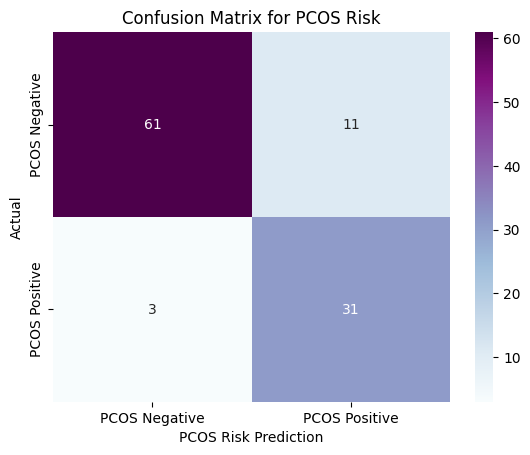

In [14]:
# confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)

ax = sns.heatmap(ConfusionMatrix, annot=True, cmap='BuPu')
ax.set_title('Confusion Matrix for PCOS Risk');
ax.set_xlabel('PCOS Risk Prediction')
ax.set_ylabel('Actual');
ax.xaxis.set_ticklabels(['PCOS Negative','PCOS Positive'])
ax.yaxis.set_ticklabels(['PCOS Negative','PCOS Positive'])
plt.show()

## Hyperparameter Tuning with GridSearchCV
- finding best parameters for best roc-auc score

In [15]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # regularization strength
    'penalty': ['l1', 'l2'],  # regularization type
    'solver': ['liblinear']  # needed for L1 regularization
}

grid_search = GridSearchCV(LogisticRegression(class_weight='balanced', max_iter=1000), param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Grid-Search ROC-AUC score: {grid_search.best_score_:.4f}")

Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best Grid-Search ROC-AUC score: 0.9676


In [16]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  # probability scores for ROC-AUC

In [17]:
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test ROC-AUC Score: {auc:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.8396
Test ROC-AUC Score: 0.9228

Confusion Matrix:
 [[60 12]
 [ 5 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.83      0.88        72
           1       0.71      0.85      0.77        34

    accuracy                           0.84       106
   macro avg       0.82      0.84      0.82       106
weighted avg       0.85      0.84      0.84       106



## Logistic Regression with RFE
- Steps:
    - Standardisation
    - SMOTE
    - RFE
    - K-fold cross validation
    - GridSearchCV

In [18]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline as ImbPipeline

In [19]:
rfecv = RFECV(
    estimator=model,
    step=1,
    cv=StratifiedKFold(5),
    scoring='roc_auc',
    n_jobs=-1
)

pipeline = ImbPipeline(steps=[
    ('smote', smotenc),
    ('scaler', scaler),
    ('feature_selection', rfecv),
    ('classifier', model)
])

# define hyperparameter grid
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smote',
                                        SMOTENC(categorical_features=['Blood '
                                                                      'Group_A+',
                                                                      'Blood '
                                                                      'Group_A-',
                                                                      'Blood '
                                                                      'Group_AB+',
                                                                      'Blood '
                                                                      'Group_AB-',
                                                                      'Blood '
                                                                      'Group_B+',
                                                                      'Blood '
                                                                      'Group_B-',
                                                                      'Blood '
                                                                      'Group_O+',
                                                                      'Blood '
                                                                      'Group_O-',
                                                                      'Menstrual '
                                                                      'Cycle(R/I)_irregular',
                                                                      'Menstrual '
                                                                      'Cycle(R/I)_regular',...
                                        RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                                              estimator=LogisticRegression(class_weight='balanced',
                                                                           max_iter=1000),
                                              n_jobs=-1, scoring='roc_auc')),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [20]:
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

# evaluate test set
y_pred = grid_search.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nTest set performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# get selected features
best_rfecv = grid_search.best_estimator_.named_steps['feature_selection']
selected_features = X.columns[best_rfecv.support_]
print("Selected features:", list(selected_features))

Best parameters found: {'classifier__C': 0.1, 'classifier__penalty': 'l2'}
Best cross-validation score: 0.9595

Test set performance:
Accuracy: 0.8962264150943396
ROC-AUC score: 0.9080882352941176
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        72
           1       0.78      0.94      0.85        34

    accuracy                           0.90       106
   macro avg       0.87      0.91      0.89       106
weighted avg       0.91      0.90      0.90       106

Selected features: ['Age (yrs)', 'BMI', 'Pulse rate(bpm)', 'Menstrual Cycle Length(days)', 'Marriage Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions', 'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH/LH', 'Waist:Hip Ratio', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'